In [130]:
import xarray as x
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

data_ECHAM = x.open_dataset("/Users/annika/Desktop/Project/Full_Data/DT12/f05____________20181001_0000_ECHAM5.nc", engine='netcdf4')
data_ECHAM
t = 9

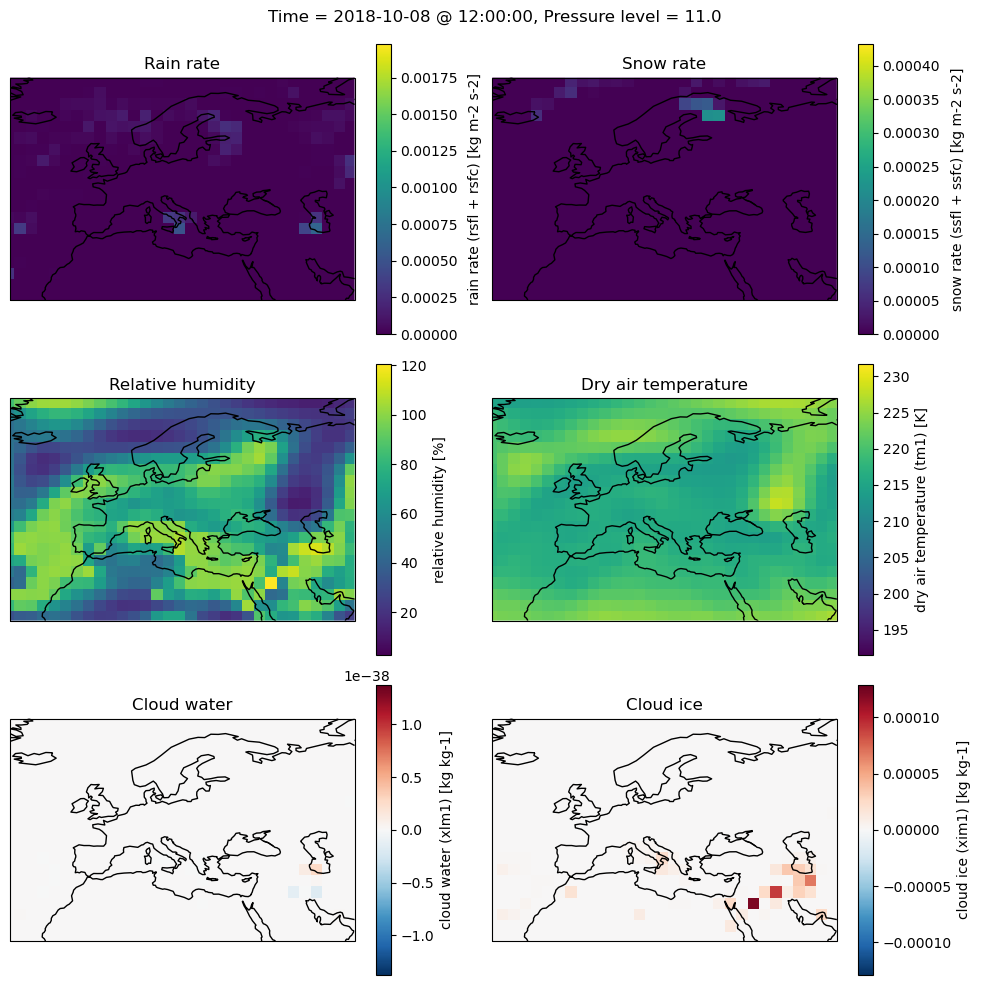

In [131]:
# Rain rate [kg m^-2 s^-2]
rsfl = data_ECHAM['rsfl_2d'].isel(time = t)
rsfc = data_ECHAM['rsfc_2d'].isel(time = t)
rainr = rsfl + rsfc
# Snow rate [kg m^-2 s^-2]
ssfl = data_ECHAM['ssfl_2d'].isel(time = t)
ssfc = data_ECHAM['ssfc_2d'].isel(time = t)
snowr = ssfl + ssfc
# Relative humidity
rel_hum = data_ECHAM['rhum'].isel(time = t, lev = 10)
# Dry air temperature
dry_temp = data_ECHAM['tm1'].isel(time = t, lev = 10)
# Cloud water
cloud_water = data_ECHAM['xlm1'].isel(time = t, lev = 10)
# Cloud ice
cloud_ice = data_ECHAM['xim1'].isel(time = t, lev = 10)

fig, ax = plt.subplots(3, 2, figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
extent = [-25, 60, 20, 70]
# Rain rate [kg m^-2 s^-2]
ax1 = ax[0, 0]
ax1.coastlines()
ax1.set_extent(extent)
rainrplot = rainr.plot(ax=ax1, transform=ccrs.PlateCarree())
ax1.annotate('rain rate (rsfl + rsfc) [kg m-2 s-2]', xy=(1.33, 0.5), xycoords='axes fraction', 
             va='center', rotation='vertical')
ax1.set_title('Rain rate')
# Snow rate [kg m^-2 s^-2]
ax2 = ax[0, 1]
ax2.coastlines()
ax2.set_extent(extent)
snowrplot = snowr.plot(ax=ax2, transform=ccrs.PlateCarree())
ax2.annotate('snow rate (ssfl + ssfc) [kg m-2 s-2]', xy=(1.33, 0.5), xycoords='axes fraction', 
             va='center', rotation='vertical')
ax2.set_title('Snow rate')
# Relative humidity
ax3 = ax[1, 0]
ax3.coastlines()
ax3.set_extent(extent)
rel_humplot = rel_hum.plot(ax=ax3, transform=ccrs.PlateCarree())
ax3.set_title('Relative humidity')
# Dry air temperature
ax4 = ax[1, 1]
ax4.coastlines()
ax4.set_extent(extent)
dry_tempplot = dry_temp.plot(ax=ax4, transform=ccrs.PlateCarree())
ax4.set_title('Dry air temperature')
# Cloud water
ax5 = ax[2, 0]
ax5.coastlines()
ax5.set_extent(extent)
cloud_waterplot = cloud_water.plot(ax=ax5, transform=ccrs.PlateCarree())
ax5.set_title('Cloud water')
# Cloud ice
ax6 = ax[2, 1]
ax6.coastlines()
ax6.set_extent(extent)
cloud_iceplot = cloud_ice.plot(ax=ax6, transform=ccrs.PlateCarree())
ax6.set_title('Cloud ice')

plt.suptitle('Time = 2018-10-05 @ 12:00:00, Pressure level = 11.0')
plt.tight_layout()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

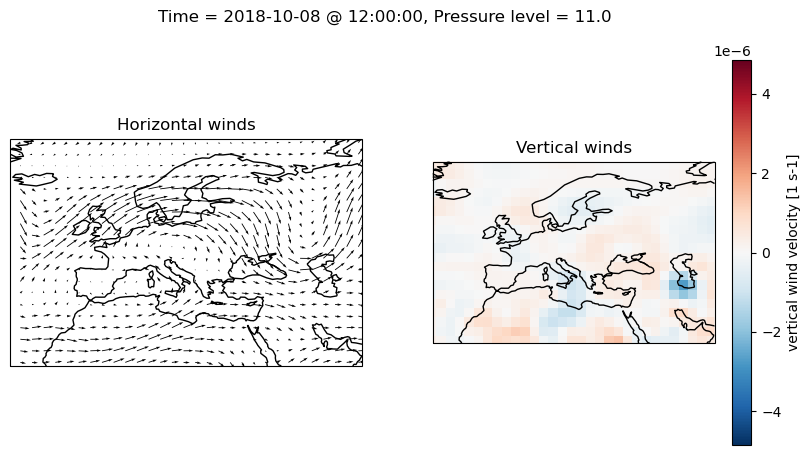

In [132]:
# u-winds
u_wind = data_ECHAM['um1'].isel(time = t, lev = 10)
u_wind = x.concat([u_wind.sel(lon=slice(0., 60.)), u_wind.sel(lon=slice(335., 360.))], dim="lon")
u_wind = u_wind.sel(lat=slice(80., 20.))
# v-winds
v_wind = data_ECHAM['vm1'].isel(time = t, lev = 10)
v_wind = x.concat([v_wind.sel(lon=slice(0., 60.)), v_wind.sel(lon=slice(335., 360.))], dim="lon")
v_wind = v_wind.sel(lat=slice(80., 20.))
# u-winds & v-winds altogether [m s^-1]
lon, lat = np.meshgrid(u_wind.lon, u_wind.lat)
# Vertical wind in "etadot"
eta_wind = data_ECHAM['etadot'].isel(time = t, ilev = 10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), subplot_kw={'projection': ccrs.PlateCarree()})
extent = [-25, 60, 20, 70]
# u-winds & v-winds
ax1.coastlines()
ax1.set_extent(extent)
ax1.quiver(lon, lat, u_wind, v_wind)
ax1.set_title('Horizontal winds')
# Vertical wind in "etadot"
ax2.coastlines()
ax2.set_extent(extent)
eta_windplot = eta_wind.plot(transform=ccrs.PlateCarree())
ax2.set_title("Vertical winds")

plt.suptitle('Time = 2018-10-05 @ 12:00:00, Pressure level = 11.0')
plt.tight_layout